In [1]:
import transformer_functions as tf

import importlib
import getpass
import urllib.parse
import psycopg2

import datetime
import pytz
import calendar

from math import floor, ceil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme()

In [2]:
print('\nEDM login information')

edm_address = getpass.getpass(prompt='EDM server address: ')
edm_name = getpass.getpass(prompt='Username: ')
edm_password = getpass.getpass(prompt='Password: ')
#edm_password = urllib.parse.quote(edm_password)


add = urllib.parse.urlparse(f'postgresql://{edm_name}:{edm_password}@{edm_address}/edm')

conn = psycopg2.connect(host = add.hostname, 
                        database = add.path[1:], 
                        password = add.password, 
                        user = add.username)

# Delete the credential variables for security purpose.
del edm_name, edm_password, add


EDM login information
Username: ········
Password: ········


In [83]:
importlib.reload(tf);

In [84]:
t = tf.transformer(grid = 'awefice', id = 'transformer_16')
t.retrieve_data(conn)

In [85]:
t.fit_ch_full_capacity([tf.charger(10,120), tf.charger(6,120), tf.charger(23,120)], 10)

TypeError: cannot convert the series to <class 'float'>

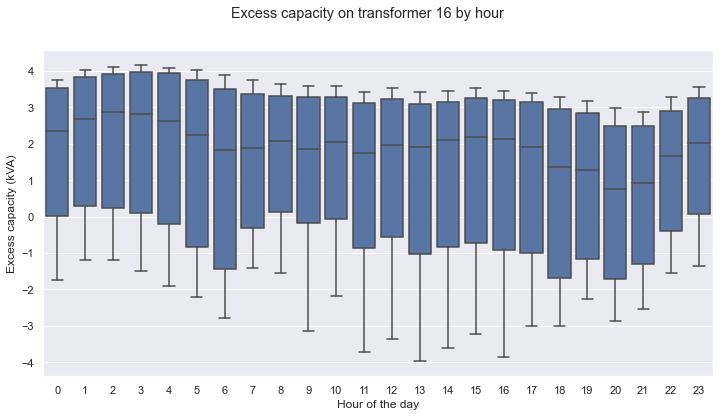

In [76]:
t.graph_capacity_hourly()

In [59]:
t.retrieve_data(conn)

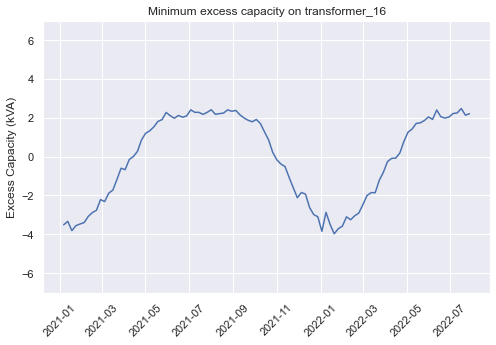

In [63]:
t.graph_excess_capacity('2021-01-01', '2022-07-28', aggregator = 'min', bins = 100, figheight = 5, figwidth = 8)

In [33]:
print(t.capacity_data.head(24))

                       load  Excess Capacity
timestamp                                   
2021-01-01 00:00:00  17.900          717.100
2021-01-01 01:00:00  18.236          716.764
2021-01-01 02:00:00  18.733          716.267
2021-01-01 03:00:00  17.664          717.336
2021-01-01 04:00:00  19.922          715.078
2021-01-01 05:00:00  21.669          713.331
2021-01-01 06:00:00  22.894          712.106
2021-01-01 07:00:00  22.586          712.414
2021-01-01 08:00:00  21.361          713.639
2021-01-01 09:00:00  23.089          711.911
2021-01-01 10:00:00  22.749          712.251
2021-01-01 11:00:00  25.634          709.366
2021-01-01 12:00:00  23.823          711.177
2021-01-01 13:00:00  25.991          709.009
2021-01-01 14:00:00  25.858          709.142
2021-01-01 15:00:00  22.894          712.106
2021-01-01 16:00:00  23.715          711.285
2021-01-01 17:00:00  22.355          712.645
2021-01-01 18:00:00  22.304          712.696
2021-01-01 19:00:00  20.511          714.489
2021-01-01

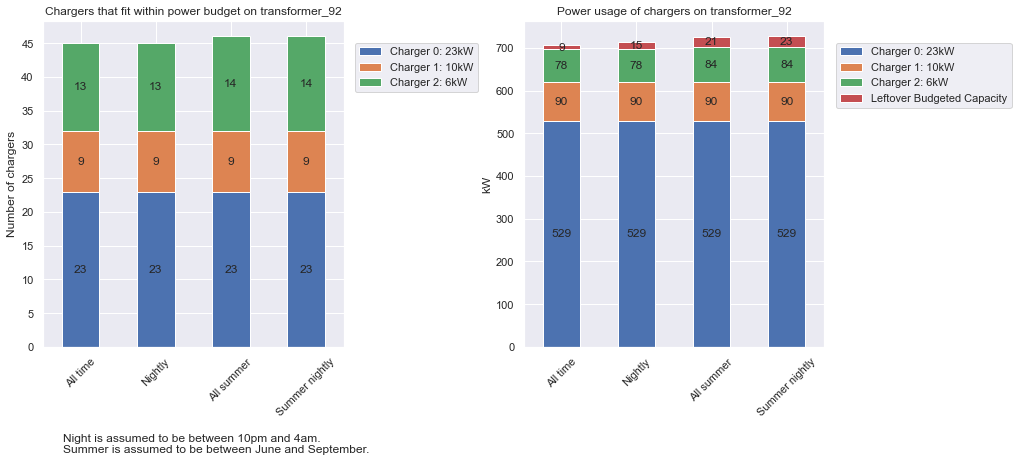

In [34]:
t.graph_power_scenarios([(tf.charger(10,120),0.2), (tf.charger(6,120),0.3), tf.charger(23,120)])

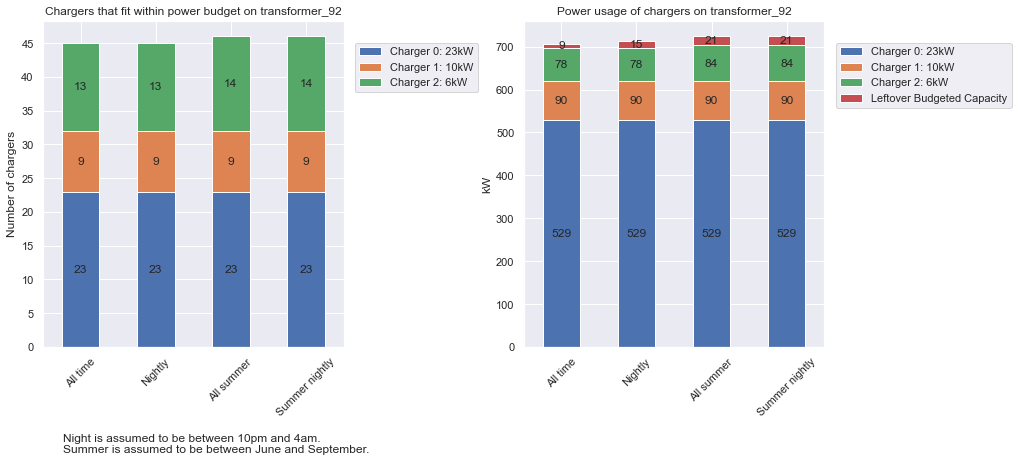

In [38]:
t.graph_power_scenarios([(tf.charger(10,120),0.2), (tf.charger(6,120),0.3), tf.charger(23,120)])

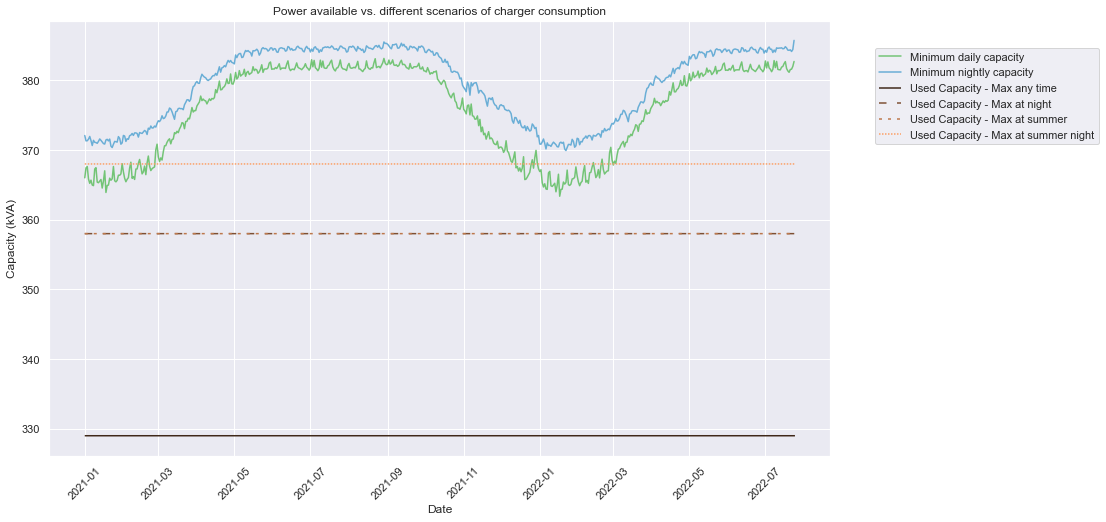

In [26]:
t.graph_capacity_with_chargers([(tf.charger(10,120),0.2), (tf.charger(6,120),0.3), tf.charger(23,120)])

In [109]:
importlib.reload(tf);

In [112]:
ts = [tf.transformer(grid = 'awefice', id = 'transformer_92')]
ts.append(tf.transformer(grid = 'awefice', id = 'transformer_43'))
ts.append(tf.transformer(grid = 'awefice', id = 'transformer_26'))

for t in ts:
    t.retrieve_data(conn)

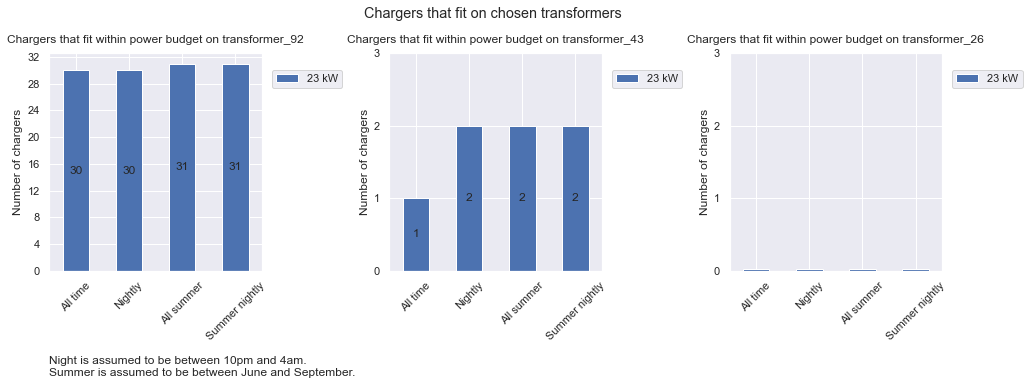

In [113]:
tf.graph_chargers_on(ts, [tf.charger(23,120)])

In [62]:
importlib.reload(tf);
t = tf.transformer(grid = 'awefice', id = 'transformer_92')
t.retrieve_data(conn)

In [23]:
t.fit_ch_pow_proportional([(tf.charger(10,120),0.2), (tf.charger(6,120),0.3), tf.charger(23,120)])

,Excess Capacity,Charger 0: 23kW,Charger 1: 10kW,Charger 2: 6kW,Used Capacity
timestamp,,,,,
2021-01-01 00:00:00,717.100,15,14,35,695
2021-01-01 01:00:00,716.764,15,14,35,695
2021-01-01 02:00:00,716.267,15,14,35,695
2021-01-01 03:00:00,717.336,15,14,35,695
2021-01-01 04:00:00,715.078,15,14,35,695
...,...,...,...,...,...
2022-07-24 13:00:00,726.145,15,14,36,701
2022-07-24 14:00:00,727.028,15,14,36,701
2022-07-24 15:00:00,727.395,15,14,36,701


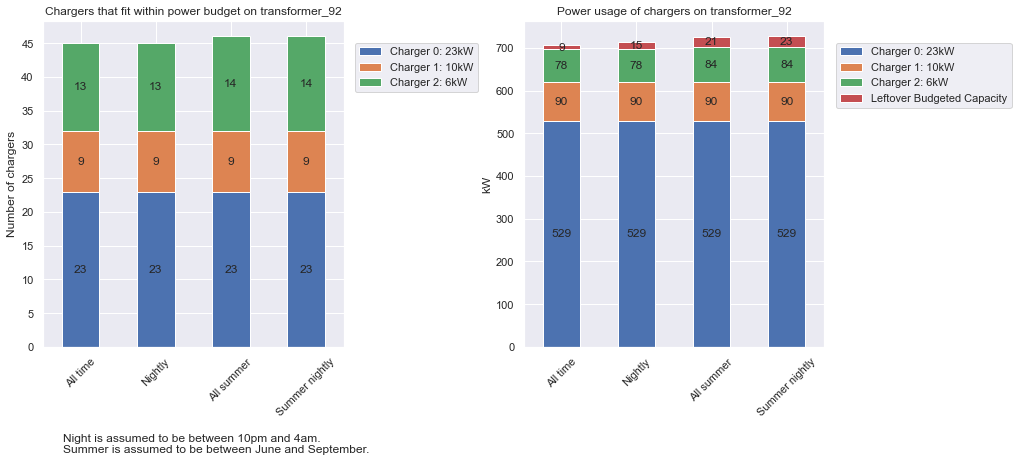

In [63]:
t.graph_power_scenarios([(tf.charger(10,120),0.2), (tf.charger(6,120),0.3), tf.charger(23,120)], prop = 'num')

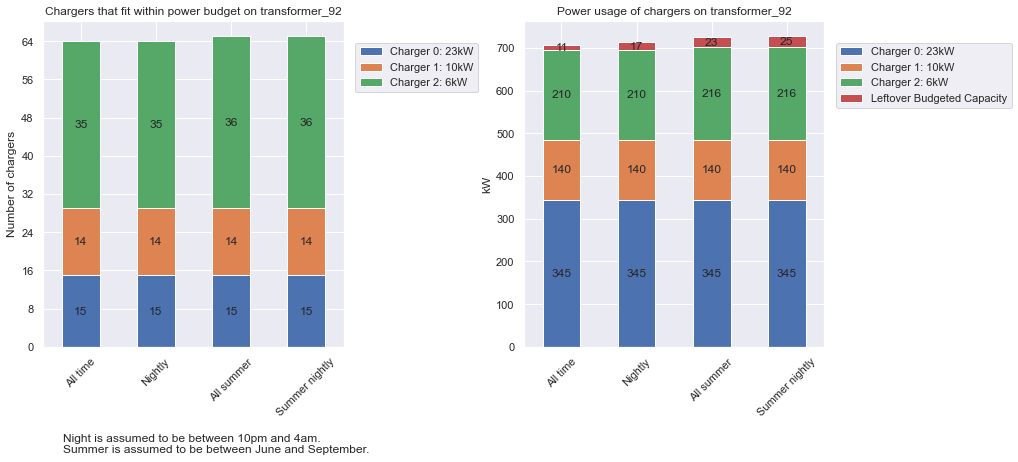

In [64]:
t.graph_power_scenarios([(tf.charger(10,120),0.2), (tf.charger(6,120),0.3), tf.charger(23,120)], prop = 'pow')